Do `Kernel -> Restart & Run All` in top menu to run the notebook

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from scipy.signal import freqz, tf2zpk
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Definice systému pomocí diferenční rovnice

$$
y[n] = x[n] + x[n-1] - 0.81 y[n-2]
$$

Obecně vypadá rovnice diskrétního filtru takto:
$$
y[n] = \sum_{k=0}^Q b_k x[n-k] - \sum_{k=1}^P a_k y[n-k].
$$

Koeficienty $a$ a $b$ v našem systému jsou tedy 
$$
a_1 = 0, a_2 = 0.81, b_0 = 1, b_1 = 1,
$$
navíc koeficient $a_0 = 1$ (toto bude platit vždy).

In [3]:
a = [1, 0, 0.81]
b = [1, 1, 0]

# Nuly, póly

<IPython.core.display.Javascript object>


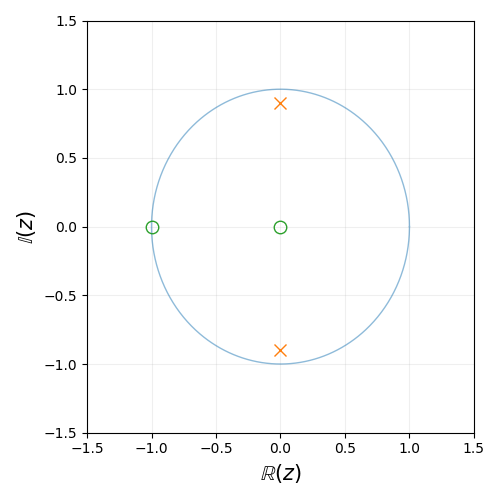

In [4]:
(n,p,k) = tf2zpk(b,a)

plt.figure(figsize=(5,5))
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('$\mathbb{R}(z)$', fontsize=15)
plt.ylabel('$\mathbb{I}(z)$', fontsize=15)

# jednotkova kruznice
ang = np.linspace(0,2*np.pi,1000)
plt.plot(np.cos(ang), np.sin(ang), linewidth=1, alpha=0.5)

# vykresleni nul a polu
plt.plot(p.real, p.imag, 'x', markersize=9)
plt.plot(n.real, n.imag, 'o', markersize=9, markerfacecolor='None')

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Modul přenosové funkce

In [5]:
# ugly implementation
# probably there's a scipy function for this?
def transfer_func(z, n, p):
    nom = 1
    for i in range(n.shape[0]):
        nom *= (z-n[i])
    denom = 1
    for i in range(p.shape[0]):
        denom *= (z-p[i])
    return nom / denom

In [6]:
x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)
X,Y = np.meshgrid(x,y)
tr_f = transfer_func(X + 1j*Y, n, p)

thresh = 5

<IPython.core.display.Javascript object>


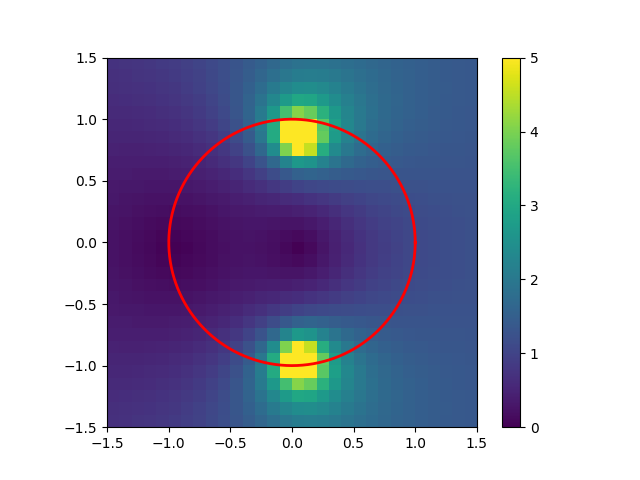

In [7]:
fig = plt.figure()
f = plt.imshow(np.minimum(np.abs(tr_f), thresh), interpolation='none', extent=[-1.5,1.5,-1.5,1.5])
plt.colorbar()
cmap = f.get_cmap()

# unit circle
ang = np.linspace(0,2*np.pi,1000)
plt.plot(np.cos(ang), np.sin(ang), linewidth=2, color='red')

plt.show()

Hodnoty okolo pólů jsou klipnuté na hodnotu 5 (protože jsou hodně vysoké a z obrázku by nešlo nic vidět). Červená kružnice vyznačuje část přenosové funkce, kde se nachází frekvenční charakteristika.

<IPython.core.display.Javascript object>


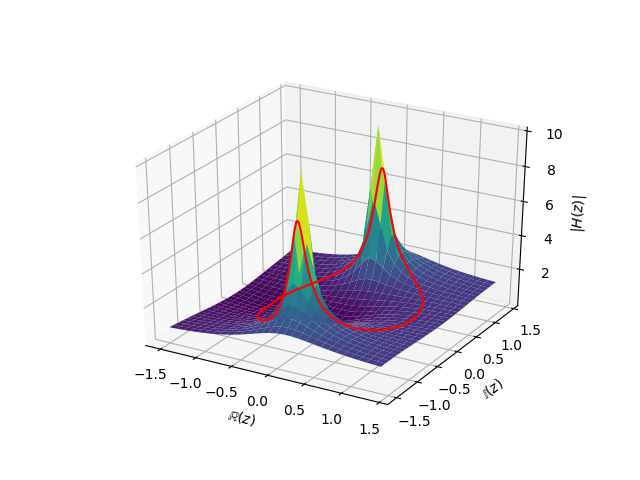

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.minimum(np.abs(tr_f),10), cmap=cmap)
tr_f_unit_circ = transfer_func(np.cos(ang) + 1j*np.sin(ang), n, p)
ax.plot(np.cos(ang), np.sin(ang), np.minimum(np.abs(tr_f_unit_circ),10), color='red')
ax.set_xlabel('$\mathbb{R}(z)$')
ax.set_ylabel('$\mathbb{I}(z)$')
ax.set_zlabel('$|H(z)|$')
plt.show()

# Modulová frekvenční charakteristika

<IPython.core.display.Javascript object>


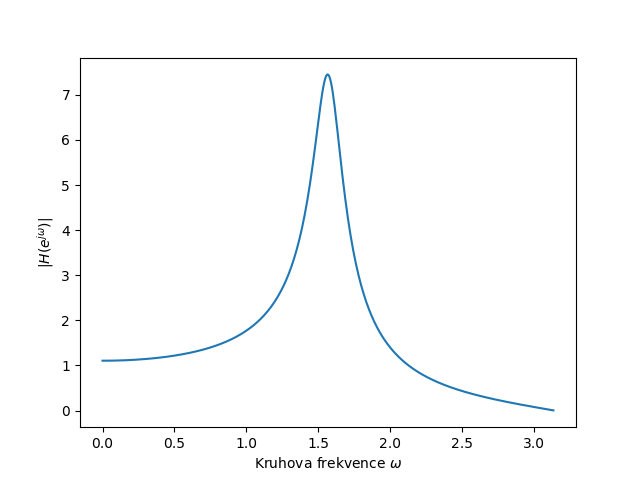

In [9]:
(w,H) = freqz(b,a)
plt.figure()
plt.plot(w, np.abs(H))
plt.xlabel('Kruhova frekvence $\omega$')
plt.ylabel('$|H(e^{j\omega})|$')
plt.show()